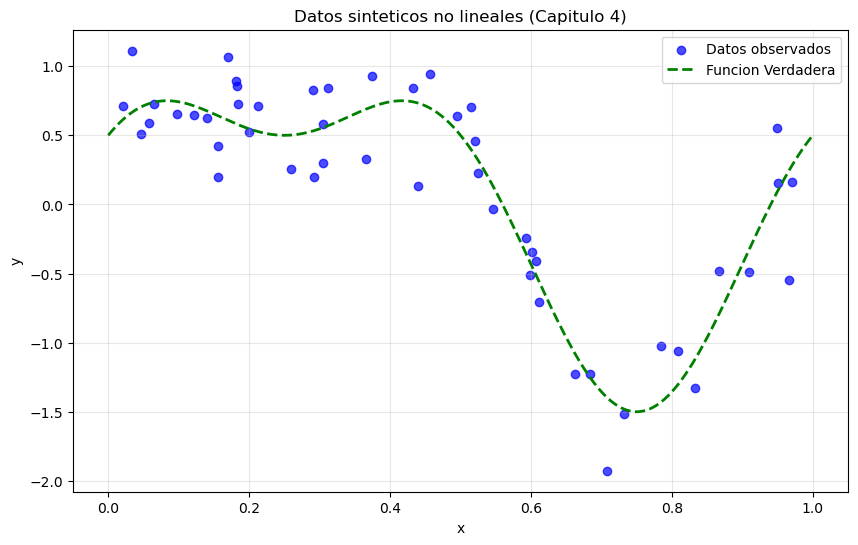

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Funcion Verdadera (no lineal)
def true_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * np.cos(4 * np.pi * x)

# Generar Datos
N = 50
x = np.random.uniform(0, 1, N)
epsilon = np.random.normal(0, 0.3, N)
y = true_function(x) + epsilon

# Puntos para evaluar la prediccion (suave)
x_test = np.linspace(0, 1, 200)
y_test_true = true_function(x_test)

# Graficar datos
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Datos observados')
plt.plot(x_test, y_test_true, 'g--', linewidth=2, label='Funcion Verdadera')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos sinteticos no lineales (Capitulo 4)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

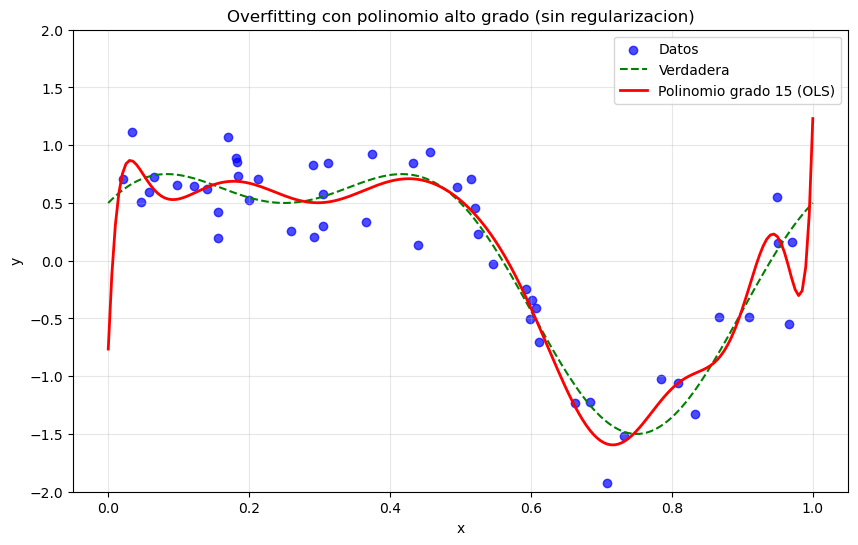

In [13]:
grado = 15  # Alto grado para ver overfitting

# Matriz de diseño polinominal
X_poly = np.column_stack([x**k for k in range(grado + 1)])

# OLS: minimos cuadrados
betas_poly = np.linalg.lstsq(X_poly, y, rcond=None)[0]

# Prediccion en x_test
X_test_poly = np.column_stack([x_test**k for k in range(grado + 1)])
y_pred_poly = X_test_poly @ betas_poly

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Datos')
plt.plot(x_test, y_test_true, 'g--', label='Verdadera')
plt.plot(x_test, y_pred_poly, 'r-', linewidth=2, label=f'Polinomio grado {grado} (OLS)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overfitting con polinomio alto grado (sin regularizacion)')
plt.legend()
plt.ylim(-2, 2)
plt.grid(True, alpha=0.3)
plt.show()

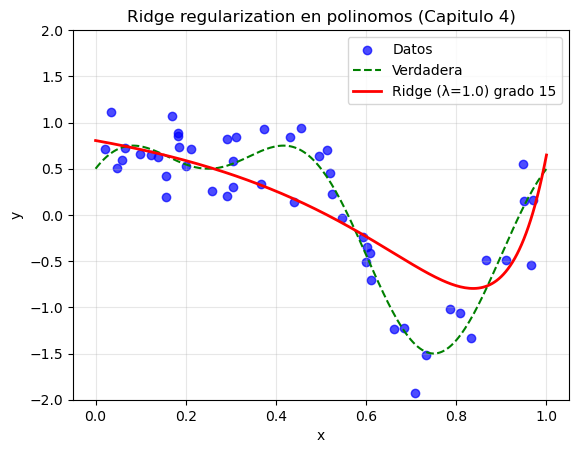

In [14]:
def ridge_poly(X, y, lambda_param=0.0, grado=15):
    X_poly = np.column_stack([X**k for k in range(grado + 1)])
    n, p = X_poly.shape
    I = np.eye(p)
    I[0, 0] = 0  # No penalizar intercepto
    XtX_plus_lambdaI = X_poly.T @ X_poly + lambda_param * I
    betas = np.linalg.inv(XtX_plus_lambdaI) @ X_poly.T @ y
    return betas, X_poly

lambda_ridge = 1.0  # Prueba 0, 1e-5, 1e-3, 1e-1, 1

betas_ridge, X_poly_train = ridge_poly(x, y, lambda_param=lambda_ridge)
X_poly_test = np.column_stack([x_test**k for k in range(grado + 1)])
y_pred_ridge = X_poly_test @ betas_ridge

plt.Figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Datos')
plt.plot(x_test, y_test_true, 'g--', label='Verdadera')
plt.plot(x_test, y_pred_ridge, 'r-', linewidth=2, label=f'Ridge (λ={lambda_ridge}) grado {grado}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge regularization en polinomos (Capitulo 4)')
plt.legend()
plt.ylim(-2, 2)
plt.grid(True, alpha=0.3)
plt.show()

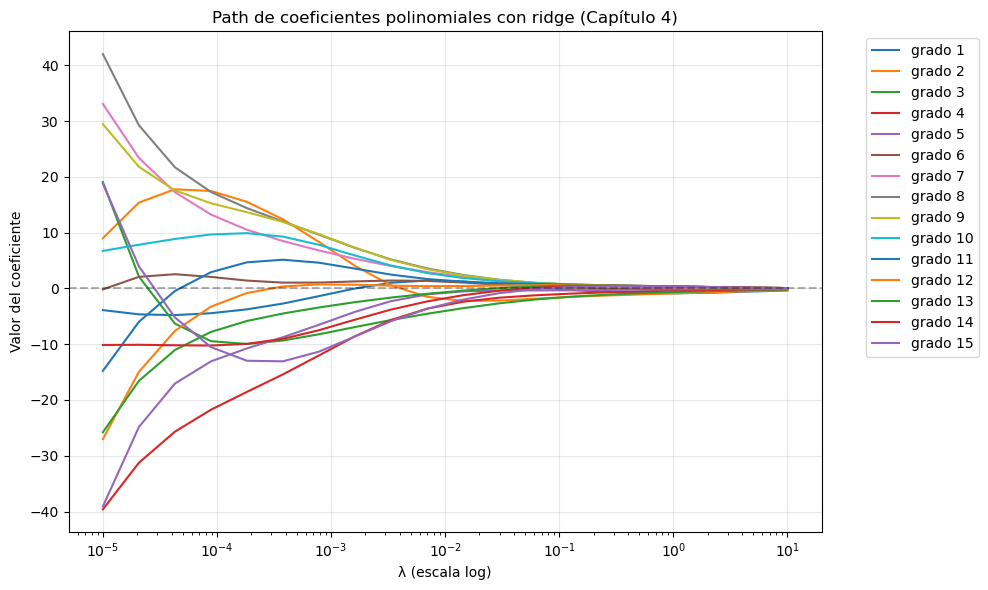

In [15]:
lambdas = np.logspace(-5, 1, 20)  # De 0.00001 a 10
grado = 15
coef_path = np.zeros((len(lambdas), grado + 1))  # coeficientes de 0 a grado 15

for i, lam in enumerate(lambdas):
    betas, _ = ridge_poly(x, y, lambda_param=lam, grado=grado)
    coef_path[i] = betas

plt.figure(figsize=(10, 6))
for k in range(1, grado + 1):  # desde x^1 hasta x^15
    plt.plot(lambdas, coef_path[:, k], label=f'grado {k}', linewidth=1.5)

plt.xscale('log')
plt.xlabel('λ (escala log)')
plt.ylabel('Valor del coeficiente')
plt.title('Path de coeficientes polinomiales con ridge (Capítulo 4)')
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()